In [35]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier

from sklearn.model_selection import cross_val_score, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score,f1_score,roc_curve


import seaborn as sns
import matplotlib.pyplot as plt





In [36]:
df = pd.read_csv('conversion_data_train.csv')
df

,country,age,new_user,source,total_pages_visited,converted
0,China,22,1,Direct,2,0
1,UK,21,1,Ads,3,0
2,Germany,20,0,Seo,14,1
3,US,23,1,Seo,3,0
4,US,28,1,Direct,3,0
...,...,...,...,...,...,...
284575,US,36,1,Ads,1,0
284576,US,31,1,Seo,2,0
284577,US,41,1,Seo,5,0
284578,US,31,1,Direct,4,0


In [37]:
df.describe(include='all')

,country,age,new_user,source,total_pages_visited,converted
count,284580,284580.000000,284580.000000,284580,284580.000000,284580.000000
unique,4,NaN,NaN,3,NaN,NaN
top,US,NaN,NaN,Seo,NaN,NaN
freq,160124,NaN,NaN,139477,NaN,NaN
mean,NaN,30.564203,0.685452,NaN,4.873252,0.032258
std,NaN,8.266789,0.464336,NaN,3.341995,0.176685
min,NaN,17.000000,0.000000,NaN,1.000000,0.000000
25%,NaN,24.000000,0.000000,NaN,2.000000,0.000000
50%,NaN,30.000000,1.000000,NaN,4.000000,0.000000
75%,NaN,36.000000,1.000000,NaN,7.000000,0.000000


In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284580 entries, 0 to 284579
Data columns (total 6 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   country              284580 non-null  object
 1   age                  284580 non-null  int64 
 2   new_user             284580 non-null  int64 
 3   source               284580 non-null  object
 4   total_pages_visited  284580 non-null  int64 
 5   converted            284580 non-null  int64 
dtypes: int64(4), object(2)
memory usage: 13.0+ MB


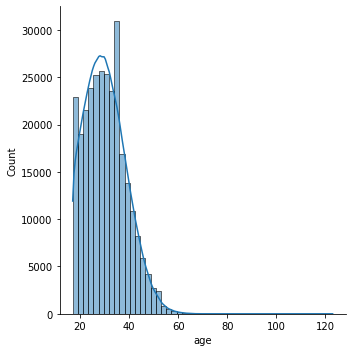

In [39]:
sns.displot(df['age'],bins = 50,kde=True);

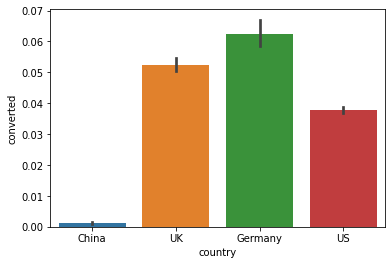

In [40]:
sns.barplot(x=df['country'],y = df['converted']);

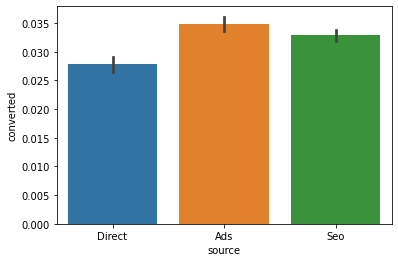

In [41]:
sns.barplot(x=df['source'],y = df['converted']);

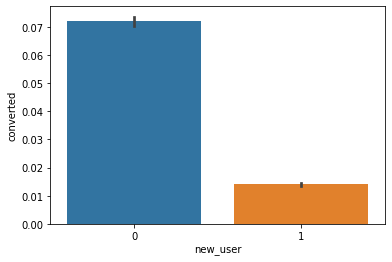

In [42]:
sns.barplot(x=df['new_user'],y = df['converted']);

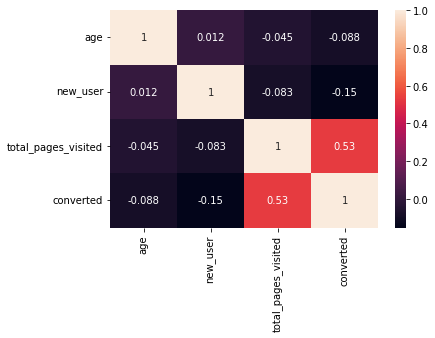

In [43]:
sns.heatmap(df.corr(),annot=True)
plt.show()

In [44]:
df.head()

,country,age,new_user,source,total_pages_visited,converted
0,China,22,1,Direct,2,0
1,UK,21,1,Ads,3,0
2,Germany,20,0,Seo,14,1
3,US,23,1,Seo,3,0
4,US,28,1,Direct,3,0


In [45]:
X = df.drop(['converted','country','source'],axis=1)
Y = df['converted']

In [46]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.33)

X_train = X_train.values
X_test = X_test.values
Y_train = Y_train.tolist()
Y_test = Y_test.tolist()
print("...Done")

...Done


In [47]:
logistic = LogisticRegression()
decision = DecisionTreeClassifier()
random = RandomForestClassifier()

In [48]:
logistic.fit(X_train,Y_train)
decision.fit(X_train,Y_train)
random.fit(X_train,Y_train)

RandomForestClassifier()

In [49]:
Y_train_predict_logistic  = logistic.predict(X_train)
Y_train_predict_decision =  decision.predict(X_train)
Y_train_predict_random =  random.predict(X_train)
Y_test_predict_logistic  = logistic.predict(X_test)
Y_test_predict_decision  = decision.predict(X_test)
Y_test_predict_random  = random.predict(X_test)

In [50]:
print('LOGISTIC')
print("accuracy on training set : ", accuracy_score(Y_train, Y_train_predict_logistic))
print("accuracy on test set : ", accuracy_score(Y_test, Y_test_predict_logistic))
print()

print("f1-score on training set : ", f1_score(Y_train, Y_train_predict_logistic))
print("f1-score on test set : ", f1_score(Y_test, Y_test_predict_logistic))
print()
print('DECISION')
print("accuracy on training set : ", accuracy_score(Y_train, Y_train_predict_decision))
print("accuracy on test set : ", accuracy_score(Y_test, Y_test_predict_decision))
print()

print("f1-score on training set : ", f1_score(Y_train, Y_train_predict_decision))
print("f1-score on test set : ", f1_score(Y_test, Y_test_predict_decision))
print()
print('RANDOM')
print("accuracy on training set : ", accuracy_score(Y_train, Y_train_predict_random))
print("accuracy on test set : ", accuracy_score(Y_test, Y_test_predict_random))
print()

print("f1-score on training set : ", f1_score(Y_train, Y_train_predict_random))
print("f1-score on test set : ", f1_score(Y_test, Y_test_predict_random))
print()


LOGISTIC
accuracy on training set :  0.9849476577086873
accuracy on test set :  0.9855503024107676

f1-score on training set :  0.7361162191982347
f1-score on test set :  0.7516016840563794

DECISION
accuracy on training set :  0.9854249270984119
accuracy on test set :  0.9850498338870431

f1-score on training set :  0.7441303747352914
f1-score on test set :  0.743327239488117

RANDOM
accuracy on training set :  0.9854249270984119
accuracy on test set :  0.9851563165516654

f1-score on training set :  0.7473406673333939
f1-score on test set :  0.7477379659790083



In [51]:
imp = pd.DataFrame({'Variable' : X.columns,'feature_importances'  : random.feature_importances_})
imp

,Variable,feature_importances
0,age,0.046286
1,new_user,0.045448
2,total_pages_visited,0.908266


In [52]:
random.get_params().keys()

dict_keys(['bootstrap', 'ccp_alpha', 'class_weight', 'criterion', 'max_depth', 'max_features', 'max_leaf_nodes', 'max_samples', 'min_impurity_decrease', 'min_samples_leaf', 'min_samples_split', 'min_weight_fraction_leaf', 'n_estimators', 'n_jobs', 'oob_score', 'random_state', 'verbose', 'warm_start'])

In [53]:
param = {'n_estimators': [500,200],'min_samples_split' : [4],'max_depth' : [50]}
grid_random = GridSearchCV(estimator=random,param_grid=param,cv=3,verbose=2,scoring='f1')
grid_random.fit(X_train,Y_train)
Y_train_predict_random_grid_random =  grid_random.best_estimator_.predict(X_train)
Y_test_predict_random_grid_random  = grid_random.best_estimator_.predict(X_test)
print("f1-score on training set : ", f1_score(Y_train, Y_train_predict_random_grid_random))
print("f1-score on test set : ", f1_score(Y_test, Y_test_predict_random_grid_random))

Fitting 3 folds for each of 2 candidates, totalling 6 fits
[CV] END max_depth=50, min_samples_split=4, n_estimators=500; total time=  30.4s
[CV] END max_depth=50, min_samples_split=4, n_estimators=500; total time=  26.7s
[CV] END max_depth=50, min_samples_split=4, n_estimators=500; total time=  27.3s
[CV] END max_depth=50, min_samples_split=4, n_estimators=200; total time=  10.9s
[CV] END max_depth=50, min_samples_split=4, n_estimators=200; total time=  10.8s
[CV] END max_depth=50, min_samples_split=4, n_estimators=200; total time=  10.8s
f1-score on training set :  0.7468365953573053
f1-score on test set :  0.7456029011786038


In [54]:
param = {'penalty': ['None','l1','elasticnet','l2'],'fit_intercept' : [True,False],'solver':['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'] }
grid_logistic = GridSearchCV(estimator=logistic,param_grid=param,cv=3,scoring='f1')
grid_logistic.fit(X_train,Y_train)
Y_train_predict_logistic_grid =  grid_logistic.best_estimator_.predict(X_train)
Y_test_predict_logistic_grid  = grid_logistic.best_estimator_.predict(X_test)
print("f1-score on training set : ", f1_score(Y_train, Y_train_predict_logistic_grid))
print("f1-score on test set : ", f1_score(Y_test, Y_test_predict_logistic_grid))

C:\Users\elvis\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning:

The max_iter was reached which means the coef_ did not converge

C:\Users\elvis\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning:

The max_iter was reached which means the coef_ did not converge

C:\Users\elvis\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning:

The max_iter was reached which means the coef_ did not converge

C:\Users\elvis\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning:

The max_iter was reached which means the coef_ did not converge

C:\Users\elvis\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning:

The max_iter was reached which means the coef_ did not converge

C:\Users\elvis\AppData\Local\Progra

f1-score on training set :  0.7361162191982347
f1-score on test set :  0.7516016840563794


In [55]:
ada = AdaBoostClassifier(base_estimator = random,n_estimators= 50,learning_rate=2)
ada.fit(X_train,Y_train)
Y_train_predict_AdaBoost =  ada.predict(X_train)
Y_test_predict_AdaBoost =ada.predict(X_test)
print("f1-score on training set : ", f1_score(Y_train, Y_train_predict_AdaBoost))
print("f1-score on test set : ", f1_score(Y_test, Y_test_predict_AdaBoost))

f1-score on training set :  0.7426043682609897
f1-score on test set :  0.742930122240467


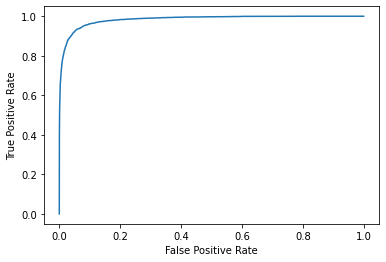

In [56]:
from sklearn.metrics import RocCurveDisplay
y_score_test = logistic.decision_function(X_test)
fpr, tpr, _ = roc_curve(Y_test, y_score_test, pos_label=logistic.classes_[1])
roc_display = RocCurveDisplay(fpr=fpr, tpr=tpr).plot()

Preparation du fichier de test a envoyer

In [57]:
X_test = pd.read_csv('conversion_data_test.csv')
X_test

,country,age,new_user,source,total_pages_visited
0,UK,28,0,Seo,16
1,UK,22,1,Direct,5
2,China,32,1,Seo,1
3,US,32,1,Ads,6
4,China,25,0,Seo,3
...,...,...,...,...,...
31615,Germany,25,1,Seo,3
31616,US,36,1,Ads,7
31617,UK,33,1,Seo,5
31618,UK,25,1,Seo,14


In [58]:
 X_test = test_file.drop(['country','source'],axis=1)
 X_test

,age,new_user,total_pages_visited
0,28,0,16
1,22,1,5
2,32,1,1
3,32,1,6
4,25,0,3
...,...,...,...
31615,25,1,3
31616,36,1,7
31617,33,1,5
31618,25,1,14


In [59]:
X_test_predict = logistic.predict(X_test)
pd.DataFrame(X_test_predict,columns=['Prediction']).to_csv('Prediction_challenge.csv',index=False)

C:\Users\elvis\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:444: UserWarning:

X has feature names, but LogisticRegression was fitted without feature names



In [60]:
pd.read_csv('Prediction_challenge.csv')

,Prediction
0,1
1,0
2,0
3,0
4,0
...,...
31615,0
31616,0
31617,0
31618,0


Le model Logitic est le plus performant sur le f1 scrore: 

LOGISTIC
accuracy on training set :  0.9853777246312962
accuracy on test set :  0.9847942754919499

f1-score on training set :  0.7452950849625433
f1-score on test set :  0.7364341085271319

Avec d'avantage d'observation il serait possible d'avoir un meilleur score. 